In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('cpdata.csv')
df2 = pd.read_csv('Crop_recommendation.csv')
df = pd.merge(df1, df2, on=['temperature', 'humidity', 'ph', 'rainfall', 'label'], how='outer')
df.head()

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,90.0,42.0,43.0
1,21.770462,80.319644,7.038096,226.655537,rice,85.0,58.0,41.0
2,23.004459,82.320763,7.840207,263.964248,rice,60.0,55.0,44.0
3,26.491096,80.158363,6.980401,242.864034,rice,74.0,35.0,40.0
4,20.130175,81.604873,7.628473,262.717340,rice,78.0,42.0,42.0


In [3]:
df['label'] = df.pop('label')
df.head()

,temperature,humidity,ph,rainfall,N,P,K,label
0,20.879744,82.002744,6.502985,202.935536,90.0,42.0,43.0,rice
1,21.770462,80.319644,7.038096,226.655537,85.0,58.0,41.0,rice
2,23.004459,82.320763,7.840207,263.964248,60.0,55.0,44.0,rice
3,26.491096,80.158363,6.980401,242.864034,74.0,35.0,40.0,rice
4,20.130175,81.604873,7.628473,262.717340,78.0,42.0,42.0,rice


In [4]:
df.isnull().sum()

temperature       0
humidity          0
ph                0
rainfall          0
N              2300
P              2300
K              2300
label             0
dtype: int64

In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['N', 'P', 'K']] = imputer.fit_transform(df[['N', 'P', 'K']])

In [6]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
N              0
P              0
K              0
label          0
dtype: int64

In [7]:
df.to_csv('Crop_Recommendation_System.csv', index=False)

In [8]:
label_values = set(df['label'].values)
print(label_values)
print(len(label_values))

{'banana', 'apple', 'watermelon', 'Mung Bean', 'pomegranate', 'coffee', 'Tobacco', 'Adzuki Beans', 'Peas', 'Kidney Beans', 'Jute', 'maize', 'Rubber', 'cotton', 'rice', 'groundnuts', 'Coconut', 'Pigeon Peas', 'Chickpea', 'mango', 'Sugarcane', 'Moth Beans', 'Ground Nut', 'muskmelon', 'peas', 'papaya', 'beans', 'Cotton', 'grapes', 'Lentil', 'Tea', 'Coffee', 'wheat', 'Black gram', 'cowpeas', 'millet', 'orange', 'Soyabeans'}
38


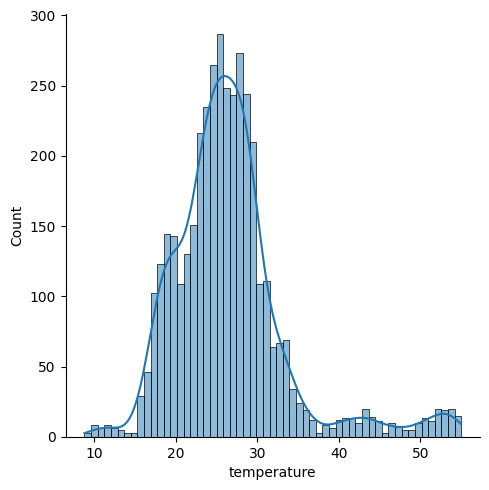

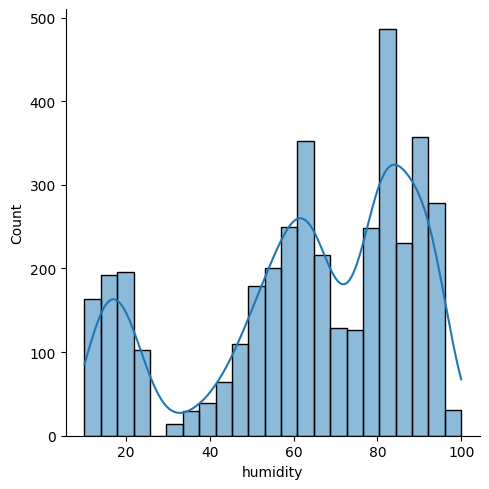

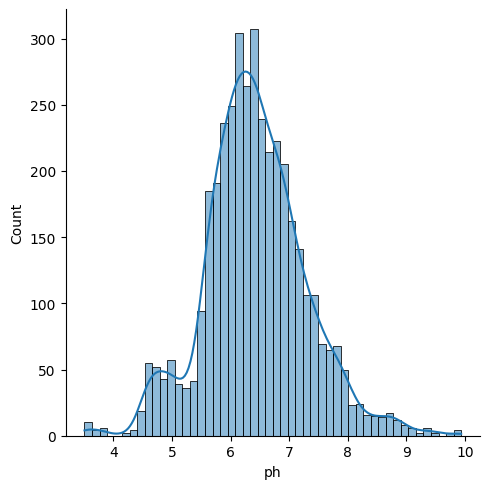

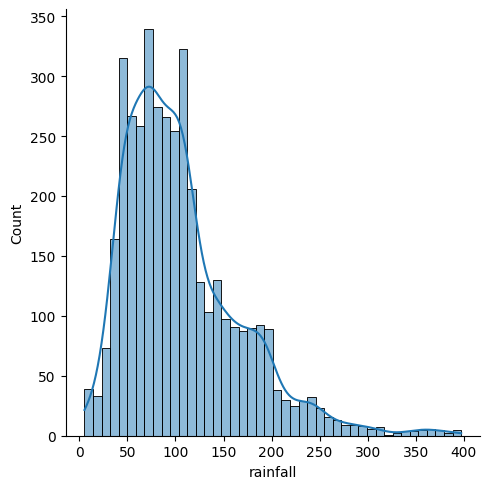

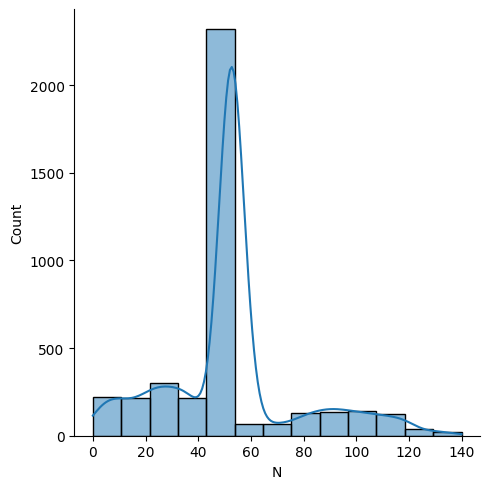

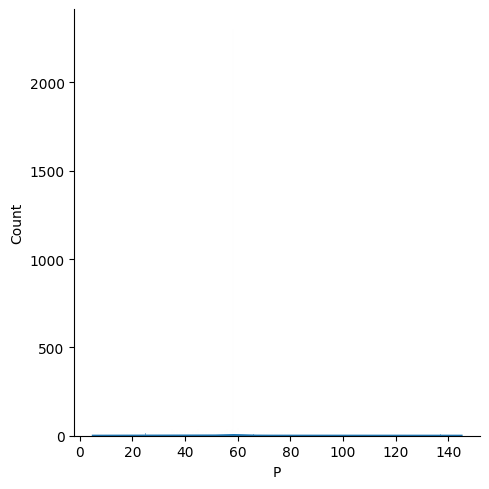

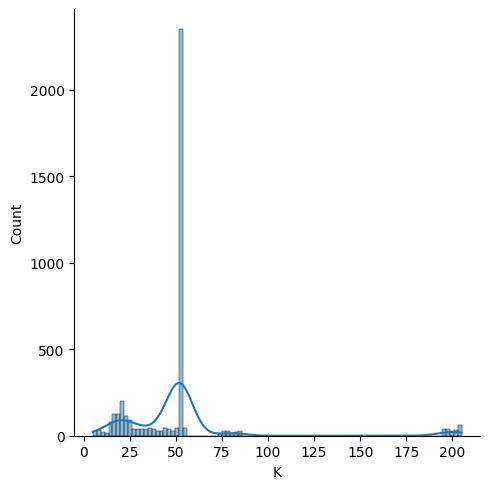

In [9]:
for column in ['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']:
    sns.displot(df[column], kde=True)

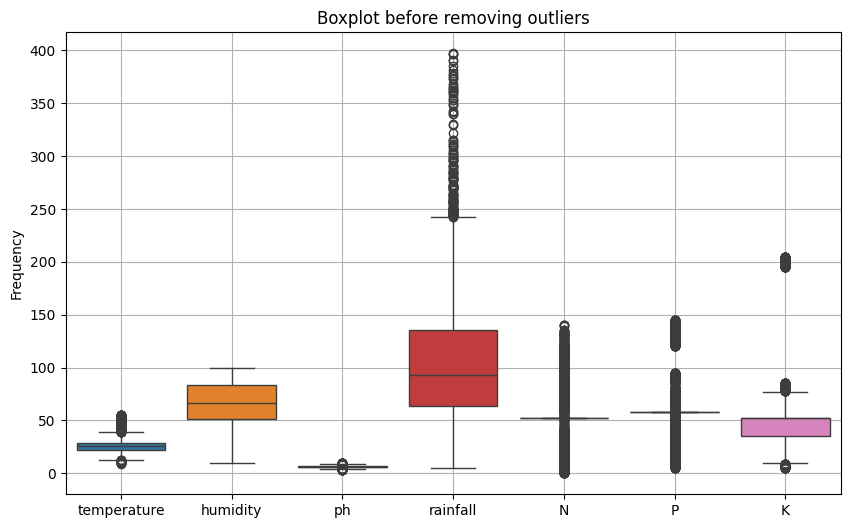

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']])
plt.title('Boxplot before removing outliers')
plt.ylabel('Frequency')
plt.xticks(range(7), df[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']])
plt.grid(True)
plt.show()

In [11]:
df = pd.get_dummies(df, ['label'])
df.head()

,temperature,humidity,ph,rainfall,N,P,K,label_Adzuki Beans,label_Black gram,label_Chickpea,...,label_mango,label_millet,label_muskmelon,label_orange,label_papaya,label_peas,label_pomegranate,label_rice,label_watermelon,label_wheat
0,20.879744,82.002744,6.502985,202.935536,90.0,42.0,43.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,21.770462,80.319644,7.038096,226.655537,85.0,58.0,41.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,23.004459,82.320763,7.840207,263.964248,60.0,55.0,44.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,26.491096,80.158363,6.980401,242.864034,74.0,35.0,40.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,20.130175,81.604873,7.628473,262.717340,78.0,42.0,42.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.iloc[:, :7]
Y = df.iloc[:, 7:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

Y_train = Y_train.idxmax(axis=1)
Y_test = Y_test.idxmax(axis=1)

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

Y_pred_train = rf.predict(X_train)
Y_pred_test = rf.predict(X_test)

print('Training Accuracy : ', accuracy_score(Y_train, Y_pred_train))
print('Testing Accuracy : ', accuracy_score(Y_test, Y_pred_test))

print('\nClassification Report :-\n', classification_report(Y_test, Y_pred_test))
print('\nConfusion Matrix :-\n', confusion_matrix(Y_test, Y_pred_test))

Training Accuracy :  1.0
Testing Accuracy :  0.9825757575757575

Classification Report :-
                     precision    recall  f1-score   support

label_Adzuki Beans       1.00      1.00      1.00        30
  label_Black gram       0.97      1.00      0.99        36
    label_Chickpea       1.00      1.00      1.00        27
     label_Coconut       1.00      1.00      1.00        26
      label_Coffee       0.84      0.97      0.90        33
      label_Cotton       1.00      1.00      1.00        33
  label_Ground Nut       0.89      1.00      0.94        32
        label_Jute       0.93      0.96      0.95        27
label_Kidney Beans       1.00      1.00      1.00        28
      label_Lentil       0.97      1.00      0.99        35
  label_Moth Beans       1.00      0.93      0.96        29
   label_Mung Bean       1.00      1.00      1.00        35
        label_Peas       1.00      1.00      1.00        32
 label_Pigeon Peas       0.92      0.85      0.88        27
      la

In [13]:
import pickle

with open('Crop_Recommendation_System.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
with open('Crop_Recommendation_System.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
prediction = loaded_model.predict(X_test)
print('Testing Accuracy of Loaded Model : ', loaded_model.score(X_test, Y_test))

Testing Accuracy of Loaded Model :  0.9825757575757575
